In [2]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [4]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    #loop used to extract few records for prediction of model on new data points
    # for i in range(8):
    #     print("prediction=",predictions[i],"target=",y_test[i],X_test[i][0])
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [5]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    # feature_to_plot1 = X[:,0] 
    # feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [14]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None
def tester(testing_row=None):
   
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        # pred=modeltest(X_test,y_test,model,verbose=False)
        pred=modeltest(X_test,y_test,model)
        
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        # print(x1.shape)

        # print(y1.shape)
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round((abs(y1-pred1))*100/y1,2),"%")
        print("---------------------------------------------------------")
        print()
    # print(type(pred))
    return pred
        


<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.12260390861654
Epoch [200/1000], Loss: 4.013583157430179
Epoch [300/1000], Loss: 3.9636142436413917
Epoch [400/1000], Loss: 3.9370718690371254
Epoch [500/1000], Loss: 3.921261438846709
Epoch [600/1000], Loss: 3.91107870103309
Epoch [700/1000], Loss: 3.90420492520844
Epoch [800/1000], Loss: 3.899436796015191
Epoch [900/1000], Loss: 3.896074164179754
Epoch [1000/1000], Loss: 3.8936757655510377
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


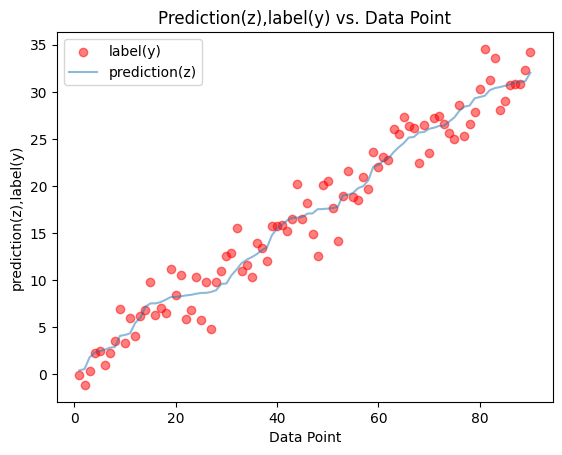

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [7]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)

def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.

    drop_features.append('y')
    X = df.drop(columns=drop_features)
    # X = df.drop(columns=['y'])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

    print(type(y_test))
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
        # print(X_test.shape,y_test.shape,pred.shape)
        print(type(y_test))
        print(type(pred))
        for i in [X_test,y_test,pred]:
        # for i in [X_test]:
            print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [8]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


In [9]:
#




In [10]:
#Function  to remove any two features and train the model


None
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.341189584205833
Epoch [200/1000], Loss: 4.0500250840011525
Epoch [300/1000], Loss: 3.9504838944878053
Epoch [400/1000], Loss: 3.914712099275345
Epoch [500/1000], Loss: 3.900909655075214
Epoch [600/1000], Loss: 3.894990458643997
Epoch [700/1000], Loss: 3.8920969713298885
Epoch [800/1000], Loss: 3.8904858247022718
Epoch [900/1000], Loss: 3.8894891814042447
Epoch [1000/1000], Loss: 3.8888257893500016
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 24.44%
Mean Absolute Error: 1.49605435106992
Mean Squared Error: 3.6086637297203823
R-squared: 0.9605519509357154
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


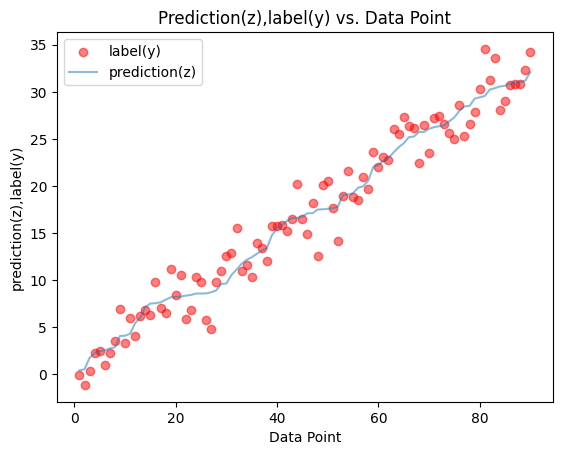

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 89.38115983845678
Epoch [200/1000], Loss: 84.26176056082626
Epoch [300/1000], Loss: 81.803886467485
Epoch [400/1000], Loss: 80.46170226736413
Epoch [500/1000], Loss: 79.66047207859457
Epoch [600/1000], Loss: 79.15591419089857
Epoch [700/1000], Loss: 78.82822899956416
Epoch [800/1000], Loss: 78.61132017339537
Epoch [900/1000], Loss: 78.46575582762308
Epoch [1000/1000], Loss: 78.36691968870332
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 4.44%
Mean Absolute Error: 8.402361373406876
Mean Squared Error: 92.64643741387005
R-squared: -0.012763028772620144
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 2])
torch.Size([90])
torch.Size([90, 1])


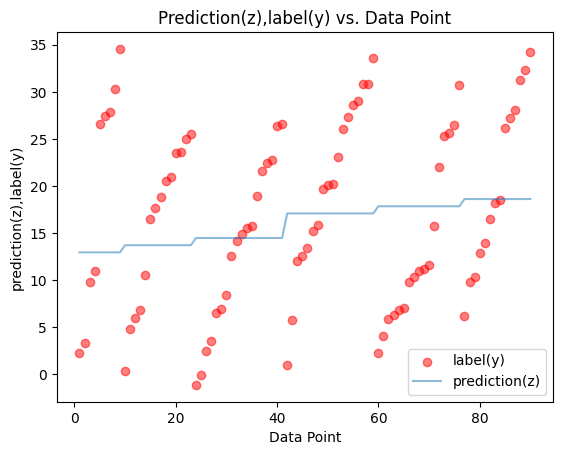

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 5.034271599515526
Epoch [200/1000], Loss: 5.033660197511305
Epoch [300/1000], Loss: 5.033441016451524
Epoch [400/1000], Loss: 5.033364773660741
Epoch [500/1000], Loss: 5.033339737239419
Epoch [600/1000], Loss: 5.033332490517821
Epoch [700/1000], Loss: 5.033331070706144
Epoch [800/1000], Loss: 5.03333132716649
Epoch [900/1000], Loss: 5.033331903916245
Epoch [1000/1000], Loss: 5.033332413333073
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7370916798658962
Mean Squared Error: 4.649000671021306
R-squared: 0.9491795245259522
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 1])
torch.Size([90])
torch.Size([90, 1])


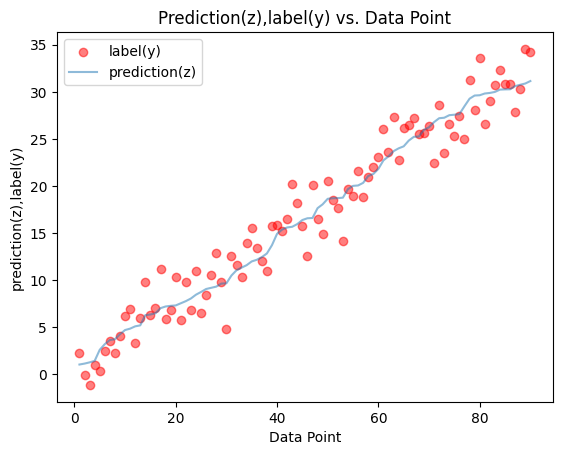

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [15]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.


print(model)
train_with_selected_features()

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])

# all

In [12]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])


tensor([[31.1428],
        [ 7.3089],
        [21.0582],
        [ 8.7396],
        [ 1.2616],
        [23.9949],
        [10.4866],
        [12.4418],
        [18.7544],
        [26.2342],
        [20.0075],
        [27.5162],
        [ 9.0545],
        [25.2173],
        [ 6.3456],
        [29.9858],
        [21.8104],
        [ 7.2661],
        [29.8187],
        [23.1468],
        [ 8.4505],
        [ 7.1985],
        [16.5937],
        [ 1.4160],
        [ 7.0185],
        [13.7120],
        [12.1554],
        [14.9104],
        [ 9.1804],
        [18.7072],
        [27.2452],
        [ 4.2470],
        [16.5684],
        [ 4.6949],
        [22.7155],
        [12.8299],
        [18.0488],
        [ 6.2730],
        [ 5.0887],
        [15.6648],
        [11.5835],
        [29.6049],
        [24.2090],
        [23.6955],
        [28.4736],
        [ 3.1959],
        [17.6412],
        [18.6360],
        [30.2676],
        [ 9.6278],
        [ 8.0464],
        [ 3.7158],
        [ 1.

In [13]:
# testing for particular value with all features:
train_with_selected_features(testing=False)
tester(2)

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
tester(2)

<class 'torch.Tensor'>
Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -3.07
actual value is  20.9
relative error is  114.67 %
---------------------------------------------------------

<class 'torch.Tensor'>
Training Done
------------------------------------------------
input size is  torch.Size([1, 1])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008]]
prediction is  6.41
actual value is  20.9
relative error is  69.34 %
---------------------------------------------------------



c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[6.4084]], dtype=torch.float64)